</h1></center><center><h1 style="font-size:350%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:40px;"> Tube Twin: Passenger Count Forecasting/ General Tube Analysis 
</h1></center>

</h1></center><center><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:5px;"> Company Name
</h1></center>

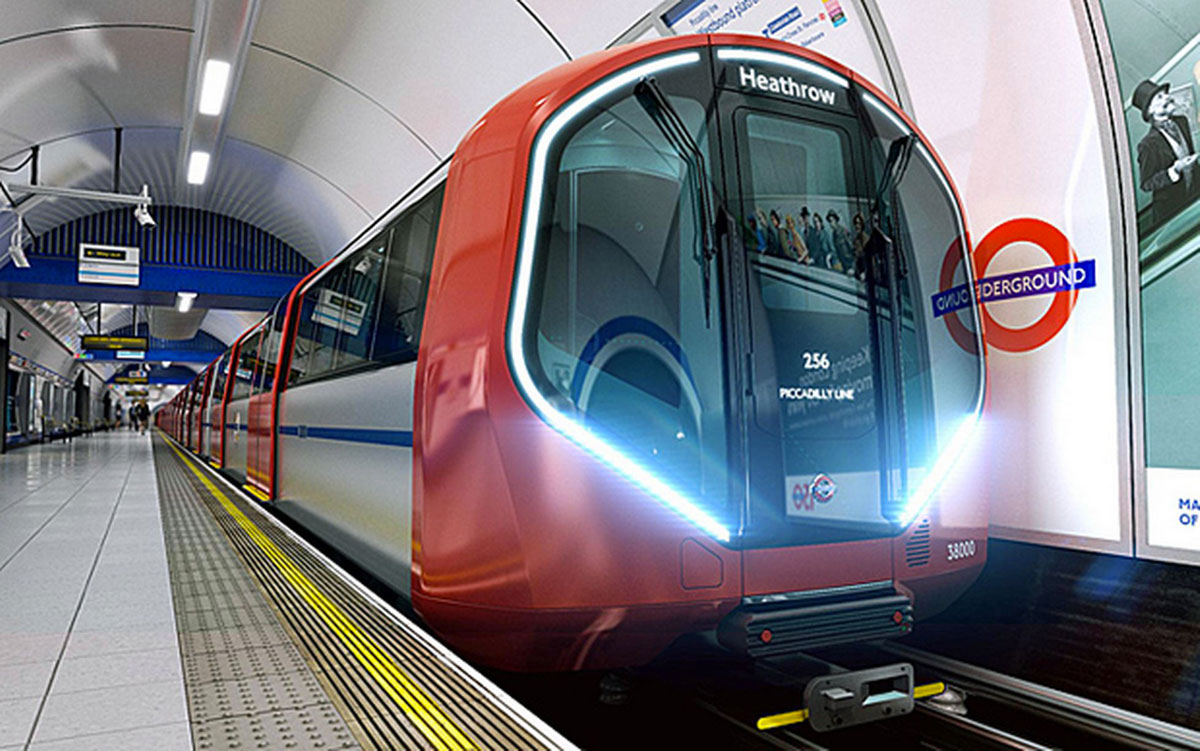

</h1></center><center><h1 style="font-size:250%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Created By
</h1></center>

</h1></left><left><h1 style="font-size:225%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> TABLE OF CONTENTS
</h1></left>

<a id="cont"></a>


<a href=#one>1. Team Members</a>

<a href=#two>2. Predict Overview</a>

<a href=#three>3. Problem Statement</a>

<a href=#four>4. Initializing Commet Experiment</a>

<a href=#five>5. Package Imports csv Files</a>

<a href=#six>6. Loading CSV Files</a>

<a href=#seven>7. Exploratory Data Analysis (EDA)</a>

<a href=#eight>8. Modeling </a> 

<a href=#nine>9. Model Performance Metrics</a>

<a href=#ten>10. Kaggle Submission</a>

<a href=#eleven>10. Logging Commet Experiment</a>

<a href=#twelve>10. Refferences</a>

<a id="one"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> Team Members
</h1></left>
<a href=#cont>Back to Table of Contents</a>


---
 ### 1. Kelvin Mwaniki               
 ### 2. Emmanuel David Fielami
 ### 3. Hakim Balogun 
 ### 4. Micheal Mamah 
 ### 5. Harmony Odumuko
 ### 6. Endurance Arienkhe
---


<a id="two"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PREDICT OVERVIEW
</h1></left>
<a href=#cont>Back to Table of Contents</a>

<a id="three"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PROBLEM STATEMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

<a id="four"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> INITIALIZING COMET EXPERIMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
'''
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="Lpfu75uOcVbBnxgwrSlgcau93",
    project_name="general",
    workspace="kev-m",
)
#Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
'''

<a id="five"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PACKAGE IMPORTS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Importing Libraries
import csv
import json
import glob
import xlrd
import logging
import sklearn
import requests
import findspark
import numpy as np
import pandas as pd
import tabula as tb
import matplotlib.pyplot as plt
from tfl.client import Client
from pyspark.sql.types import *
from pyspark import SparkContext
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, ElasticNet 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from tfl.api_token import ApiToken
from urllib.parse import urlencode
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from requests.auth import HTTPBasicAuth
from pyspark.sql.functions import col, isnan, when, count

<a id="six"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> DATA COLLECTION
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I LOADING CSV FILES
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Loading Historical Datasets
</h1></left>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> i> Annualized Entry-Exit Counts [2017-2021]
</h1></left>

In [2]:
# Annualized Entry-Exit Counts [2017 - 2021]
EntryExit_2021 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/AC2021_ByQhrEntryExit.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2020 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/AC2020_ByQhrEntryExit.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2019 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2019.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2018 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2018.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2017 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2017.xlsx', sheet_name='ByQhr', header=6) 
merged_2017_2021 =  pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2017.xlsx', sheet_name='ByQhr', header=6) 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> ii> Crowding Data
</h1></left>

In [3]:
# Crowding Data 
CRD_tld = pd.read_csv('Crowding_Data/LUTrainLoadingData.csv')
CRD_snd = pd.read_csv('Crowding_Data/StationNodesDescription.csv')
CRD_splf = pd.read_csv('Crowding_Data/StationPassengerLinkFlows.csv')

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> iii> NUMBAT Data
</h1></left>

In [4]:
# NUMBAT Definitions
NBT_defs_Nodes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Nodes', header =0)
NBT_defs_Links = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Links', header = 0)
NBT_defs_Modes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Modes', header = 0)
NBT_defs_Lines = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Lines', header = 0)
NBT_defs_Stations = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Stations', header = 0)
NBT_defs_StationComplexes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'StationComplexes', header = 0)
NBT_defs_DayTypes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'DayTypes', header = 0)
NBT_defs_Qhr = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Qhr', header = 0)
NBT_defs_Timebands = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Timebands', header = 0)
NBT_defs_Directions = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Directions', header = 0)
NBT_defs_Movements = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Movements', header = 0)

In [5]:
# 2017 NUMBAT RODS Data 
# Entry Data
NBT_entry_access = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Access mode by entry station-zone-time of day 2017.xlsx', sheet_name = 'Access', header= 4) 
NBT_entry_agm = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Age, gender, mobility category by entry station-zone-time of day 2017.xlsx', sheet_name = 'agesex', header= 3) 
NBT_entry_ajt = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Average journey time by entry station-zone-time of day 2017.xlsx', sheet_name = 'station', header= 4) 
NBT_entry_dt = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Distance travelled by entry station-zone-line-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'By station', header= 4) 
NBT_entry_jf = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Journey frequency by entry station-zone-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'by station', header= 4) 
NBT_entry_jp = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Journey purpose by entry station-zone-time of day-ticiket type 2017.xlsx', sheet_name = 'journey purpose', header= 4) 
NBT_entry_tt = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Ticket type by entry station-zone-time of day 2017.xlsx', sheet_name = 'ticket_type', header= 4) 


In [6]:
# Exit Data
NBT_exit_agm = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Age, gender, mobility category by exit station-zone-time of day 2017.xlsx', sheet_name = 'age&sex', header= 3) 
NBT_exit_ajt = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Average journey time by exit station-zone-time of day 2017.xlsx', sheet_name = 'station', header= 4) 
NBT_exit_dt = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Distance travelled by exit station-zone-line-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'by ticket type', header= 4) 
NBT_exit_egress = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Egress mode by exit station-zone-time of day 2017.xlsx', sheet_name = 'Egress', header= 4) 
NBT_exit_jf = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Journey frequency by exit station-zone-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'by station', header= 4) 
NBT_exit_jp = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Journey purpose by exit station-zone-time of day-ticket type 2017.xlsx', sheet_name = 'journey purpose', header= 4) 
NBT_exit_tt = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Ticket type by exit station-zone-time of day 2017.xlsx', sheet_name = 'ticket_type', header= 4) 


In [7]:
# Misc Data
NBT_msc_baa_boarders = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Boarders and alighters by station-line-time of day 2017.xlsx', sheet_name = 'Boarders', header= 2) 
NBT_msc_baa_alighters = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Boarders and alighters by station-line-time of day 2017.xlsx', sheet_name = 'Alighters', header= 2) 
NBT_msc_baa_line = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Boarders and alighters by station-line-time of day 2017.xlsx', sheet_name = 'Line', header= 3) 
NBT_msc_jii = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Journeys involving interchange by zone-no of interchanges 2017.xlsx', sheet_name = 'Interchanges', header= 3) 
NBT_msc_ll = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Line loading by section-line-time of day 2017.xlsx', sheet_name = 'Line_loads', header= 2) 
NBT_msc_odm = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Origin-destination matrix by station-zone-time of day 2017.xlsx', sheet_name = 'matrix', header=2 ) 
NBT_msc_rc = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Route choice by origin-destination pair 2017.xlsx', sheet_name = 'route choice', header= 2) 
NBT_msc_sf = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Station flows by station-time of day 2017.xlsx', sheet_name = 'link_flows', header= 2) 
NBT_msc_tee_entries = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Total entries and exits by borough-time of day 2017.xlsx', sheet_name = 'entries', header= 4) 
NBT_msc_tee_exits = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Total entries and exits by borough-time of day 2017.xlsx', sheet_name = 'exits', header= 4)

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Merging Excel files into a single CSV file
</h1></left>

In [ ]:
# Specifyies the path to the Excel files
path = "../TWIN TUBE Project/"
 
# Points to all of the required Excel files in the path 
file_list = glob.glob(path + "*.xlsx") 
 
# Empty list for the files we want to merge.
excl_list = []

# pd.read_excel(file_path) reads the excel data into pandas dataframe.  
for file in file_list:
    excl_list.append(pd.read_excel(file, sheet_name='ByQhr', header=6)) 
    
# Creates merged excel file from the excel files list
excl_merged = pd.concat(excl_list, ignore_index=True) 
 
# Converts the merged excel file to into a new CSV file with specified name.
excl_merged.to_csv('../TWIN TUBE Project/EntryExit_2017-2021.csv', index=False) 

# Reading the historial_tube_data CSV file 
merged_2017_2021 = pd.read_csv('../TWIN TUBE Project/EntryExit_2017-2021.csv') 

# Setting column display to show all columns and limiting decimals to 2. 
pd.set_option("display.max.columns", None, "display.precision", 2)  

In [ ]:
# Checking the merged file
merged_2017_2021.head(2)

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II LOADING LIVE FEED
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Loading API URLs
</h1></left>

In [8]:
'''
This code links the various TFL APIs to a variable for
easy record retrieval
'''
AccidentStats = '?https://api.tfl.gov.uk/AccidentStats/{year}'
AirQuality = 'https://api.tfl.gov.uk/AirQuality/'
BikePoint = 'https://api.tfl.gov.uk/BikePoint/'
Journey = 'https://api.tfl.gov.uk/Journey'
Line =  'https://api.tfl.gov.uk/Line/Route?serviceTypes=Regular'
Mode = 'https://api.tfl.gov.uk/Mode/{mode}/Arrivals[?count]'
Occupancy = 'https://api.tfl.gov.uk/Occupancy'
Road = 'https://api.tfl.gov.uk/Road/{ids}/Disruption[?stripContent][&severities][&categories][&closures]'
Search = 'https://api.tfl.gov.uk/Search/Meta/Categories'
Station = 'https://api.tfl.gov.uk/stationdata/tfl-stationdata-detailed.zip'
StopPoint = 'https://api.tfl.gov.uk/StopPoint'


</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Fetching Data from APIs
</h1></left>

In [9]:
'''
This function retrieves daily records from the various TFL APIs
depending on the API variable name used.
'''
def get_api_records(API_Name):
    # extracting Line Data directly from API
    url = API_Name
    
    # Access credentials
    app_id = 'EXPLORE_TUBE_TWIN_PROJECT'
    app_key = 'f8f6ab8258464b1ca5ddd33c0ff2ee12'
    api_token = {"app_id": app_id, "app_key": app_key}
    
    # Stating file format to use
    headers = {"Accept": "application/json"}
    
    # Initializing get request
    r = requests.get(url, api_token, headers=headers)
    
    # Assigning file to Json() format 
    File_Name = r.json()
    
    # Displaying fetched records
    return File_Name
    

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Converting Json files to CSV files
</h1></left>

<a id="seven"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> EXPLORATORY DATA ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

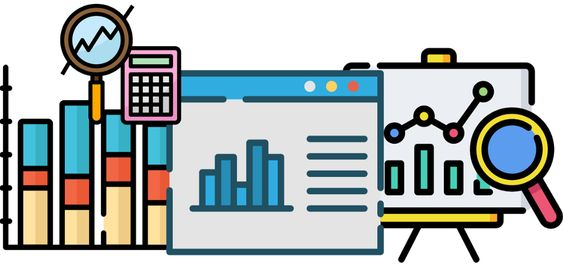

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I SUMMARY STATISTICS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

This section involves carrying out summary statistics analysis

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> i> Train Dataset
</h1></left>

##### Observations

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> ii> Test Dataset
</h1></left>

##### Observations

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II UNI-VARIATE ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

###### Observation

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> III MULTI-VARIATE ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

###### Observations

<a id="eight"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL DEVELOPMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

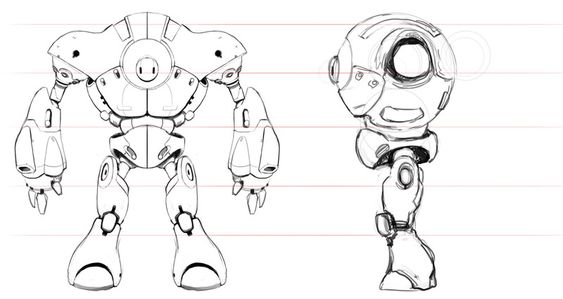

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PRE-PROCESSING
</h1></left> 
<a href=#cont>Back to Table of Contents</a>

In [10]:
'''
This function applies pre-processing feature engineering to the EntryExit [2017-2021] datasets

in preparation for building the multi-target regression model.

'''
def pre_process(name):
    # Filter the table for London Underground travel mode records only
    name[name['Mode'] == 'LU']
    # Remove any null entries within the table
    name.dropna()
    # Reset the index after removing null entries from the table 
    name.reset_index()
    # Carry out One Hot Dummy encoding on categorical features
    name = pd.get_dummies(name, columns = ['ASC','Coverage',' day',' dir'],
                  prefix = {
                      'ASC':'ASC',
                      'Coverage':'Coverage',
                      ' day':'day',
                      ' dir':'dir'
                  })
    # Carry out label encoding for the Stations feature
    le = preprocessing.LabelEncoder()
    name['Station_encoded'] = le.fit_transform(name['Station'].values)
    return name 

In [11]:
# Apply the pre_processing function to the EntryExit files
EntryExit_2021 = pre_process(EntryExit_2021)
EntryExit_2020 = pre_process(EntryExit_2020)
EntryExit_2019 = pre_process(EntryExit_2019)
EntryExit_2018 = pre_process(EntryExit_2018)
EntryExit_2017 = pre_process(EntryExit_2017)

In [12]:
EntryExit_2021.head()

,Mode,NLC,Station,year,Total,Early,AM Peak,Inter Peak,PM Peak,Evening,...,Coverage_Station entry / exit,Coverage_TfL Rail boarding / alighting,Coverage_Trams boarding / alighting,day_FRI,day_MTT,day_SAT,day_SUN,dir_IN,dir_OUT,Station_encoded
0,LU,500,Acton Town,2021,6851.444444,414.888889,2194.611111,2016.611111,1616.944444,439.444444,...,1,0,0,0,1,0,0,1,0,3
1,LU,502,Aldgate,2021,8037.733333,213.333333,1234.866667,1909.866667,3309.933333,1043.533333,...,1,0,0,0,1,0,0,1,0,6
2,LU,503,Aldgate East,2021,12751.200000,202.200000,1758.300000,3842.250000,4344.150000,1851.200000,...,1,0,0,0,1,0,0,1,0,7
3,LU,505,Alperton,2021,3108.888889,366.944444,1066.888889,823.222222,605.555556,199.222222,...,1,0,0,0,1,0,0,1,0,9
4,LU,506,Amersham,2021,2384.052632,378.894737,1050.263158,574.105263,310.842105,50.842105,...,1,0,0,0,1,0,0,1,0,10


In [13]:
# This function performs the train-test split for the pre-processed Annualized Entry Exit [2017-20121] datasets
def Xy_split(df):
    x_df = df.drop(columns = list(df)[11:107])
    x_df = x_df.drop(columns = ['Station', 'Mode'])
    y_df = df[list(df)[11:107]]
    return x_df, y_df

In [14]:
X,y = Xy_split(EntryExit_2021)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3193, 489), (3193, 96), (799, 489), (799, 96))

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">MULTI-TARGET REGRESSION 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I LINEAR REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [17]:
# define model
lr = LinearRegression()
# fit model
lr.fit(X_train, y_train)
# make a prediction
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
# summarize prediction
print(lr_pred_test[0], lr_pred_test.shape)

[-6.11718750e+00  1.46875000e+00  7.57812500e+00  1.56250000e-01
  1.24218750e+01  2.20312500e+01  2.41015625e+01  3.43750000e+01
  3.68437500e+01  3.81562500e+01  3.55000000e+01  2.84765625e+01
  3.30000000e+01  4.25312500e+01  4.89492188e+01  4.33125000e+01
  5.15625000e+01  5.53125000e+01  5.78750000e+01  6.08750000e+01
  6.70625000e+01  6.63750000e+01  6.93437500e+01  7.52500000e+01
  7.92500000e+01  8.91250000e+01  9.27500000e+01  9.35000000e+01
  9.70625000e+01  1.00875000e+02  1.07125000e+02  1.08750000e+02
  1.17187500e+02  1.19468750e+02  1.28250000e+02  1.18218750e+02
  1.24062500e+02  1.21312500e+02  1.28796875e+02  1.28218750e+02
  1.28062500e+02  1.25382812e+02  1.43500000e+02  1.40257812e+02
  1.45000000e+02  1.51625000e+02  1.70718750e+02  1.70583984e+02
  1.64789062e+02  1.85312500e+02  1.89562500e+02  1.76875000e+02
  1.82812500e+02  1.84187500e+02  1.80468750e+02  1.69437500e+02
  1.61062500e+02  1.54250000e+02  1.50250000e+02  1.37937500e+02
  1.31750000e+02  1.22437

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II K-NEAREST NEIGHBOURS REGRESSOR 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [18]:
# define model
knn = KNeighborsRegressor()
# fit model
knn.fit(X_train, y_train)
# make a prediction
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
# summarize prediction
print(knn_pred_test[0], knn_pred_test.shape)

[  0.79954444   2.110079     2.73012219   9.15084218  11.01472482
  16.14774567  20.60001126  25.95160741  30.41989867  39.01007692
  42.95477797  44.65370277  38.98447966  42.29277764  47.99770675
  51.57723682  46.132978    49.38772167  53.20351228  63.39096984
  58.32875527  65.3965905   68.94856386  76.89231796  75.53766755
  87.87668553  92.95910774  97.68753425  99.36238575 103.8424723
 111.85498759 120.84246762 120.84248338 123.30488496 131.53931569
 133.02670917 131.76680916 132.01304862 136.03943023 143.76886842
 140.89762299 136.33200391 142.35171223 149.97405618 147.10508268
 152.066073   151.52793237 168.89571807 159.64774972 163.94028572
 166.48365506 170.95921098 169.5011627  178.64314866 171.49936583
 181.08849613 159.66669365 163.27415709 162.86023836 146.27570718
 143.32921084 128.14656711 131.38505603 121.05151554 116.16286805
 100.97856502 105.20094302  99.20288019 103.65197587  96.11758189
 122.06338742 123.98703509 117.3539522  115.79049107 130.48578975
 111.251274

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">III DECISION TREE REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [19]:
# define model
dtr = DecisionTreeRegressor()
# fit model
dtr.fit(X_train, y_train)
# make a prediction
dtr_pred_train = dtr.predict(X_train)
dtr_pred_test = dtr.predict(X_test)
# summarize prediction
print(dtr_pred_test[0], dtr_pred_test.shape)

[  0.33333333   2.11111111   1.55555556  20.66666667  11.11111111
  19.11111111  18.11111111  23.11111111  41.11111111  50.66666667
  57.66666667  57.          42.22222222  45.22222222  50.55555556
  54.11111111  46.77777778  47.55555556  50.          69.22222222
  58.88888889  70.11111111  79.55555556  94.88888889  89.55555556
  91.77777778 111.77777778 102.77777778 113.77777778 119.11111111
 131.55555556 142.22222222 148.77777778 142.55555556 156.33333333
 167.55555556 170.22222222 151.88888889 158.33333333 158.44444444
 161.55555556 148.22222222 156.88888889 162.         156.66666667
 149.55555556 158.66666667 186.55555556 156.11111111 150.88888889
 149.33333333 135.55555556 157.33333333 181.88888889 159.
 165.44444444 147.77777778 138.55555556 165.44444444 158.22222222
 134.11111111 119.22222222 115.11111111 111.55555556 101.55555556
  92.22222222 100.88888889  82.77777778  89.55555556  68.11111111
 102.55555556  93.22222222  91.33333333 101.66666667 108.77777778
  97.88888889 116.

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">IV RANDOM FOREST REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [20]:
# define model
rfr = RandomForestRegressor()
# fit model
rfr.fit(X_train, y_train)
# make a prediction
rfr_pred_train = rfr.predict(X_train)
rfr_pred_test = rfr.predict(X_test)
# summarize prediction
print(rfr_pred_test[0], rfr_pred_test.shape)

[  0.83416122   1.96175911   3.68920566   7.68250638  10.87048694
  17.8890436   25.45159483  31.16603177  35.14766892  41.97323578
  46.38632919  45.67657937  41.53166376  43.945127    50.88868462
  54.8182268   50.61015008  54.40489533  59.74318982  67.36940073
  62.1491246   66.76308011  72.96173047  79.64452643  78.75405257
  87.14029625  89.86236648  97.51176202  99.813507   105.39075677
 111.16014524 119.74833568 123.35964401 125.85498894 132.70796037
 137.07221978 135.29287301 132.65281354 140.3594107  142.5681841
 141.65875138 144.98386466 148.15776859 153.02952965 156.34782817
 155.58579515 162.48833647 170.56277758 171.47851312 172.92219365
 177.14802484 176.67802572 182.45514603 182.30249583 174.8968171
 172.8496487  168.32383637 155.99322191 157.8517286  145.31349226
 135.34921505 127.82415373 125.10279745 115.28862599 109.60449104
 103.69504368 101.47072913  95.61159796  98.22401907  99.13967036
 109.32021372 117.47353923 115.26177498 115.45099714 113.70899458
 110.2019238

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">V ELASTIC NET REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [21]:
# define model
enr = ElasticNet(alpha=1.0, l1_ratio=0.5)
# fit model
enr.fit(X_train, y_train)
# make a prediction
enr_pred_train = enr.predict(X_train)
enr_pred_test = enr.predict(X_test)
# summarize prediction
print(enr_pred_test[0], enr_pred_test.shape)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+04, tolerance: 2.094e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.701e+05, tolerance: 1.293e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.267e+05, tolerance: 6.114e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.926e+05, tolerance: 6.385e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.019e+05, tolerance: 1.234e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.064e+05, tolerance: 1.311e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e+04, tolerance: 3.430e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.530e+05, tolerance: 3.491e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

[  0.94361893   2.42635111   6.07959261   7.89597482  12.86621396
  17.07371376  22.06169853  27.50644022  34.40367979  40.62200266
  44.81579947  41.44007621  38.45579891  38.94389239  41.08405104
  41.12842045  44.02377689  48.80341115  56.98968419  60.64539996
  62.86369886  64.98565893  72.42056325  76.12045116  80.39610912
  82.79118027  90.75620407  92.9505883   97.33486276  99.59962679
 104.69482738 107.92328852 113.69299008 114.71073214 120.02252172
 119.54375    122.38406706 122.51516541 128.40635458 131.50519304
 135.93888146 137.11688615 142.37863892 146.47666919 151.91460689
 158.29547543 166.89549261 167.38238691 174.1444921  179.89532841
 187.74141364 177.94638686 180.84909561 178.84574674 177.3695002
 169.67213537 163.03711987 151.20596683 144.11463462 133.68915038
 130.31584702 120.73997885 115.44601621 110.42837035 110.64585835
 110.25712138 114.80457687 119.41799836 126.68956725 149.26025843
 149.57443453 140.39800688 139.96090331 134.19703412 122.59704153
 107.878589

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.975e+03, tolerance: 3.682e+00
  model = cd_fast.enet_coordinate_descent(


</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">VI BAYESIAN REGRESSOR  
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [22]:
# define model
br = BayesianRidge()
# fit model
wrapper = MultiOutputRegressor(br)
wrapper.fit(X_train, y_train)
# make a prediction
br_pred_train = wrapper.predict(X_train)
br_pred_test = wrapper.predict(X_test)
# summarize prediction
print(br_pred_test[0], br_pred_test.shape)

[ -3.10117132   1.91277661   6.31590113   7.89594519  11.99446427
  17.02332356  24.14502748  27.08621186  34.39868776  40.78960393
  44.80908824  42.72753219  41.71131859  41.24564361  40.81979702
  38.55654627  43.60896593  48.44972981  56.35568159  58.50287825
  63.08665088  65.80217298  72.41282495  75.3837473   80.71504873
  83.82343978  90.75163916  92.58957107  97.49397145 100.05361421
 104.6967109  107.14746987 113.58108868 114.46872286 118.87488594
 117.92200361 122.35166632 122.53555811 128.25015749 130.69675961
 136.50172772 137.98319353 143.19099241 147.33922945 154.37962344
 159.81898007 167.35768892 167.37393832 176.84008415 180.88328691
 187.73807787 175.98082473 180.62777585 178.03754731 175.36549104
 166.80557629 162.28167985 149.9335504  149.58467648 138.26617925
 130.33408649 120.7371643  115.44524847 110.42595018 110.18360762
 105.79102223 111.79801839 112.79270485 117.09727164 134.74111514
 137.13910925 140.57411218 140.79390387 134.32081484 122.58449341
 112.34991

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">VII POLYNOMIAL REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [30]:
# NB Has a tendancy to crash the system when trained on 80% of the dataset due to a Memory Error.
# define model
poly_reg = PolynomialFeatures(degree = 2)
model = LinearRegression()
# fit model
x_poly_train = poly_reg.fit_transform(X_train[:1595])
x_poly_test  = poly_reg.fit_transform(X_test)
# make a prediction
model.fit(x_poly_train, y_train[:1595])
pr_pred_train = model.predict(x_poly_train)
pr_pred_test = model.predict(x_poly_test)
# summarize prediction
print(pr_pred_test[0], pr_pred_test.shape)

[ -3.34956797  -6.2552569    5.93786595  -1.13703291   5.45994702
  27.66711086  17.5630811   50.31385254 -16.91374585  51.83181654
  19.20734763  37.66350226  16.92198066  15.69758587  71.67845018
 117.37339961  73.28962401  48.29314651  42.69880347  54.15808949
  55.44139386  42.39249519  45.62944399  67.63778649  51.87688298
  69.64723568  40.27262009 104.52332478  50.32990186  83.26338289
 110.48870048 134.95974391 100.68595822 113.43489333 130.7236396
 143.53673392 159.11775207 116.76736031 146.32607369 140.20317504
 151.55445125 126.37144084 206.56455473 175.75105416 149.27066828
 162.99605445 217.11729264 160.99489691 152.04972482 142.59601233
 208.09536046 190.34867359 123.63035465 245.23836451 179.26883857
 139.3937591  145.63368424 212.07449535 100.16869623 164.5244619
 155.92735328 114.44713813 173.26825851  55.34614075 126.77848814
  60.02898483 132.64129122  83.06100665 101.30479552  97.9918034
  81.02434283  88.25027891 184.574265    75.58080145 138.97407953
   6.43649314

In [29]:
X_train.shape, y_train.shape

((3193, 489), (3193, 96))

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">VIII LOGISTIC REGRESSOR  
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# define model
lgr = LogisticRegression(max_iter=10000)
# fit model
wrapper = MultiOutputRegressor(lgr)
wrapper.fit(X_train, y_train)
# make a prediction
lgr_pred_train = wrapper.predict(X_train)
lgr_pred_test = wrapper.predict(X_test)
# summarize prediction
print(yhat[0], yhat.shape)

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">IX STEP-WISE REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# define model
lr = LinearRegression()
sfs = sfs(lr,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)
# fit model
wrapper = MultiOutputRegressor(sfs)
wrapper.fit(X_train, y_train)
# make a prediction
sfs_pred_train = wrapper.predict(X_train)
sfs_pred_test = wrapper.predict(X_test)
# summarize prediction
print(yhat[0], yhat.shape)

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL OPTIMIZATION
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> THE FINAL MODEL 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

<a id="nine"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL PERFORMANCE METRICS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

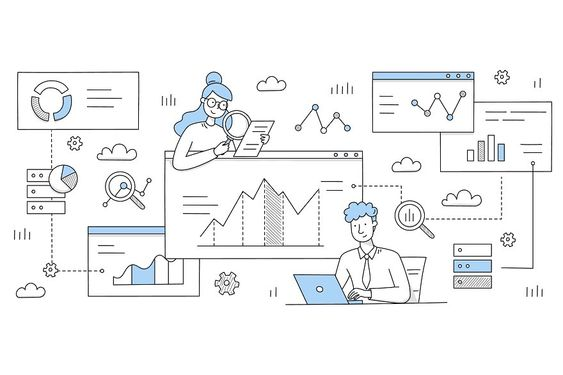

In [34]:
results_dict = {'Train RMSE':
                    {
                        "Linear Regressor": np.sqrt(mean_squared_error(y_train, lr_pred_train)),
                        "K-Nearest Neighbour regressor": np.sqrt(mean_squared_error(y_train, knn_pred_train)),
                        "Decision Tree Regressor": np.sqrt(mean_squared_error(y_train, dtr_pred_train)),
                        "Random Forest Regressor": np.sqrt(mean_squared_error(y_train, rfr_pred_train)),
                        "Elastic Net Regressor": np.sqrt(mean_squared_error(y_train, enr_pred_train)),
                        "Bayesian Regressor": np.sqrt(mean_squared_error(y_train, br_pred_train)),
                        "Polynomial Regressor": np.sqrt(mean_squared_error(y_train[:1595], pr_pred_train))
                        
                    },
                'Test RMSE':
                    {
                        "Linear Regressor": np.sqrt(mean_squared_error(y_test, lr_pred_test)),
                        "K-Nearest Neighbour Regressor": np.sqrt(mean_squared_error(y_test, knn_pred_test)),
                        "Decision Tree Regressor": np.sqrt(mean_squared_error(y_test, dtr_pred_test)),
                        "Random Forest Regressor": np.sqrt(mean_squared_error(y_test, rfr_pred_test)),
                        "ELastic Net Regressor": np.sqrt(mean_squared_error(y_test, enr_pred_test)),
                        "Bayesian Regressor": np.sqrt(mean_squared_error(y_test, br_pred_test)),
                        "Polynomial Regressor": np.sqrt(mean_squared_error(y_test[:1595], pr_pred_test))
                        
                        
                    },
             'Train R-squared':
                    {
                        "Linear Regressor": r2_score(y_train, lr_pred_train),
                        "K-Nearest Neighbour Regressor ": r2_score(y_train, knn_pred_train),
                        "Decision Tree Regressor": r2_score(y_train, dtr_pred_train),
                        "Random Forest Regressor": r2_score(y_train, rfr_pred_train),
                        "Elastic Net Regressor": r2_score(y_train, enr_pred_train),
                        "Bayesian Regressor": r2_score(y_train, br_pred_train),
                        "Polynomial Regressor": r2_score(y_train[:1595], pr_pred_train)

                    },
            'Test R-squared':
                    {
                        "Linear Regressor": r2_score(y_test, lr_pred_test),
                        "K-Nearest Neighbour Regressor": r2_score(y_test, knn_pred_test),
                        "Decision Tree Regressor": r2_score(y_test, dtr_pred_test),
                        "Random Forest Regressor": r2_score(y_test, rfr_pred_test),
                        "Elastic Net Regressor": r2_score(y_test, enr_pred_test),
                        "Bayesian Regressor": r2_score(y_test, br_pred_test),
                        "Polynomial Regressor": r2_score(y_test[:1595], pr_pred_test)
                    }

                }

In [35]:
results_dict

{'Train RMSE': {'Linear Regressor': 19.295369547206345,
  'K-Nearest Neighbour regressor': 26.78872628161697,
  'Decision Tree Regressor': 0.0,
  'Random Forest Regressor': 11.464001790109867,
  'Elastic Net Regressor': 20.979103089190197,
  'Bayesian Regressor': 20.636162470908687,
  'Polynomial Regressor': 3.66841379090668e-08},
 'Test RMSE': {'Linear Regressor': 21.961966002373824,
  'K-Nearest Neighbour Regressor': 32.85556814389997,
  'Decision Tree Regressor': 42.296336370593885,
  'Random Forest Regressor': 28.957759384834386,
  'ELastic Net Regressor': 20.4896784301058,
  'Bayesian Regressor': 20.227239097420643,
  'Polynomial Regressor': 128.55828381078436},
 'Train R-squared': {'Linear Regressor': 0.902462857207767,
  'K-Nearest Neighbour Regressor ': 0.900495826126224,
  'Decision Tree Regressor': 1.0,
  'Random Forest Regressor': 0.981917444655734,
  'Elastic Net Regressor': 0.9013192174092128,
  'Bayesian Regressor': 0.9211257974601438,
  'Polynomial Regressor': 1.0},
 'Te

<a id="eleven"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> LOGGING COMMET EXPERIMENT
</h1></left>

<a href=#cont>Back to Table of Contents</a>

In [ ]:
'''
# Create dictionaries for the data we want to log          
metrics = {
    "Index":['SVD','Normal Predictor','Baseline Only','NMF','Slope One'],
    "Fit Time": [fit_time_svd, fit_time_np, fit_time_blo, fit_time_nmf, fit_time_slo],
    "Test Time": [test_time_svd, test_time_np, test_time_blo, test_time_nmf, test_time_slo],
    "Test RMSE": [svd_rmse, np_rmse, blo_rmse, nmf_rmse, slo_rmse]
}

params= {'model': 'Base Line Only',
         'method': 2,
         'n_epochs': 50,
         }

# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

'''

<a id="twelve"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> REFFERENCES
</h1></left>
<a href=#cont>Back to Table of Contents</a>